# TimeSeries Mooring Data - Quick Plot

From an erddap Dataset, specify the Mooring ID to get a quick plot of the data

In [2]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

In [3]:
server_url = "http://akutan.pmel.noaa.gov:8081/erddap"
dataset_name = '1hr_gridded_Full_bs5_record'
dataset_name_2 = '1hr_gridded_Full_bs4_record'

In [4]:
import EcoFOCIpy.io.erddap as erddap

erddap.test_erddap_connection(url=server_url) #basic test for connection to internal server, no response is a good thing

# e = ERDDAP(server=server_url,
#           protocol='griddap',
#           response='nc')

# e.dataset_id=dataset_name

# pdf = e.to_xarray()
# pdf

In [6]:
#or directly via xarray

import xarray as xa

In [7]:
xdf = xa.load_dataset(f'{server_url}/griddap/{dataset_name}')

/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'par' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.

In [69]:
xdf_2 = xa.load_dataset(f'{server_url}/griddap/{dataset_name_2}')

/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.11/site-packages/xarray/conventions.py:432: SerializationWarning: variable 'par' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/py311/lib/python3.

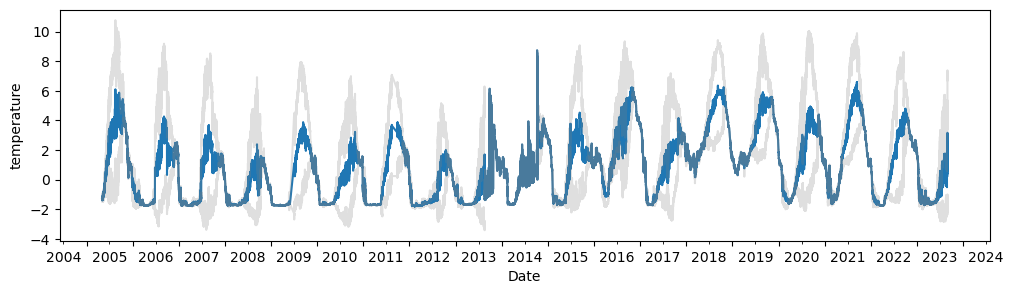

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(1,figsize=(12, 3),sharex=True)
xdf.temperature.mean(dim='depth').plot(ax=ax)
# xdf_2.temperature.mean(dim='depth').plot(ax=ax)
(xdf.temperature.mean(dim='depth')+xdf.temperature.std(dim='depth')).plot(c='grey',alpha=.25,ax=ax)
(xdf.temperature.mean(dim='depth')-xdf.temperature.std(dim='depth')).plot(c='grey',alpha=.25,ax=ax)

ax.xaxis.set_major_locator(MonthLocator(bymonth=1))
ax.xaxis.set_minor_locator(MonthLocator(bymonth=7))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

In [ ]:
## uncomment to export data
# xdf.temperature.mean(dim='depth').to_dataframe().to_csv('CKP2A_bottomtemp.csv')